In [3]:
import tensorflow as tf
import keras as k
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data1 = pd.read_excel('price.xlsx', header = None)
data2 = pd.read_excel('Total electricity consumption.xlsx', header = None)
data1

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,66.85,66.99,62.13,51.51,49.14,49.48,51.29,56.83,43.45,49.22,...,73.37,77.99,54.48,77.92,94.53,78.63,76.88,67.33,60.04,56.21
1,54.37,57.65,58.19,55.39,53.84,53.24,55.53,69.70,55.51,58.80,...,69.83,70.92,72.11,89.97,121.98,94.29,88.69,73.22,62.05,55.59
2,61.05,61.04,61.06,60.97,56.70,56.61,57.63,68.15,69.64,77.92,...,72.06,70.57,80.37,113.22,149.41,122.10,88.88,77.63,70.26,60.04
3,63.56,65.48,65.77,56.51,56.42,55.67,61.38,70.52,71.97,81.84,...,71.89,75.26,78.35,92.68,100.76,84.06,83.28,70.34,70.31,69.11
4,73.38,65.25,63.45,58.86,57.84,56.67,56.40,58.41,62.23,68.50,...,76.67,66.11,62.42,84.54,94.44,83.67,75.01,66.78,67.31,64.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,3.05,5.23,2.37,-1.15,-9.22,-3.44,-0.08,4.41,9.16,25.08,...,66.83,72.42,56.49,80.67,96.71,84.53,77.99,65.40,72.31,71.75
727,46.80,62.40,69.08,66.74,56.70,40.22,57.94,69.42,50.40,57.94,...,75.71,72.34,53.70,83.55,111.34,81.00,80.23,62.46,67.90,57.27
728,70.85,71.92,70.84,64.27,59.84,53.15,56.52,60.90,55.54,59.85,...,70.86,64.11,59.52,87.47,104.51,81.92,67.32,70.42,65.88,54.81
729,65.09,62.70,57.72,54.18,52.94,52.06,54.11,68.41,54.27,60.02,...,75.58,79.44,67.68,102.52,176.44,110.34,78.89,64.01,64.07,62.83


In [5]:
x_list = []
for i in range(724):
    x = data1.iloc[i:i+7,:]
    x_list.append(x)
X = np.array(x_list)
X.shape

(724, 7, 24)

In [6]:
y_list = []
for i in range(724):
    y = data2.iloc[i+7,:]
    y_list.append(y)
Y = np.array(y_list)
Y.shape

(724, 24)

In [7]:
# 将过去一周的Y也融合到输入中，增强price-demand pair的learning
xyx_list = []
for i in range(724):
    x = data1.iloc[i:i+7,:]
    yp = data2.iloc[i:i+7,:]
    xn = np.array(data1.iloc[i+7,:]).reshape(1,24)
    xy = np.concatenate([x,yp],axis = 0)
    xyx = np.concatenate([xy,xn],axis = 0)
    xyx_list.append(xyx)
XYX = np.array(xyx_list)
XYX.shape


(724, 15, 24)

In [8]:
k.backend.clear_session()
model = k.Sequential()
model.add(k.layers.LSTM(24, input_dim = 24, input_length = 15, activation = 'tanh', return_sequences= False ))
model.add(k.layers.Dense(256,activation="relu"))
model.add(k.layers.Dense(24,activation="relu"))
info = model.summary()
print(info)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 24)                4704      
_________________________________________________________________
dense (Dense)                (None, 256)               6400      
_________________________________________________________________
dense_1 (Dense)              (None, 24)                6168      
Total params: 17,272
Trainable params: 17,272
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
model.compile(optimizer="adam",loss="mse")
model.fit(XYX,Y,epochs=50)

Epoch 1/50
23/23 [==============================] - 0s 6ms/step - loss: 9.5478
Epoch 2/50
23/23 [==============================] - 0s 7ms/step - loss: 5.4353
Epoch 3/50
23/23 [==============================] - 0s 8ms/step - loss: 4.5791
Epoch 4/50
23/23 [==============================] - 0s 8ms/step - loss: 4.4976
Epoch 5/50
23/23 [==============================] - 0s 8ms/step - loss: 4.4266
Epoch 6/50
23/23 [==============================] - 0s 8ms/step - loss: 4.3462
Epoch 7/50
23/23 [==============================] - 0s 11ms/step - loss: 4.2556
Epoch 8/50
23/23 [==============================] - 0s 13ms/step - loss: 4.1092
Epoch 9/50
23/23 [==============================] - 0s 11ms/step - loss: 4.0512
Epoch 10/50
23/23 [==============================] - 0s 11ms/step - loss: 3.9165
Epoch 11/50
23/23 [==============================] - 0s 12ms/step - loss: 3.9033
Epoch 12/50
23/23 [==============================] - 0s 13ms/step - loss: 3.7940
Epoch 13/50
23/23 [========================

In [10]:
XYX_test = XYX[:10,::]
Y_true = Y[:10,:]
Y_test = model.predict(XYX_test)

In [11]:
Y_test

array([[2.9119966 , 4.544788  , 5.8747177 , 4.101315  , 2.3846228 ,
        0.        , 0.        , 0.        , 2.9299228 , 1.5488362 ,
        3.3272786 , 1.1369741 , 2.173356  , 1.7277794 , 0.6517333 ,
        1.4970074 , 1.8595908 , 3.9088466 , 3.4510128 , 7.6649013 ,
        4.168355  , 2.765965  , 0.        , 0.        ],
       [2.9004452 , 4.539121  , 5.8119845 , 4.0733075 , 2.3216324 ,
        0.        , 0.        , 0.        , 2.6873958 , 1.5644917 ,
        3.2631273 , 1.1412071 , 2.1799421 , 1.8257774 , 0.8377487 ,
        1.6621004 , 1.8503282 , 3.7114656 , 3.271019  , 7.509786  ,
        4.119527  , 2.7023697 , 0.        , 0.        ],
       [3.64474   , 5.2391    , 5.9287767 , 3.208706  , 1.5509564 ,
        0.        , 0.        , 0.        , 2.9155426 , 1.4167417 ,
        3.3158455 , 1.2314359 , 2.230877  , 1.7373993 , 1.1121743 ,
        1.940523  , 1.8027526 , 3.562513  , 3.0280838 , 7.3988347 ,
        4.1433234 , 2.7708044 , 0.        , 0.        ],
       [2.962

In [17]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

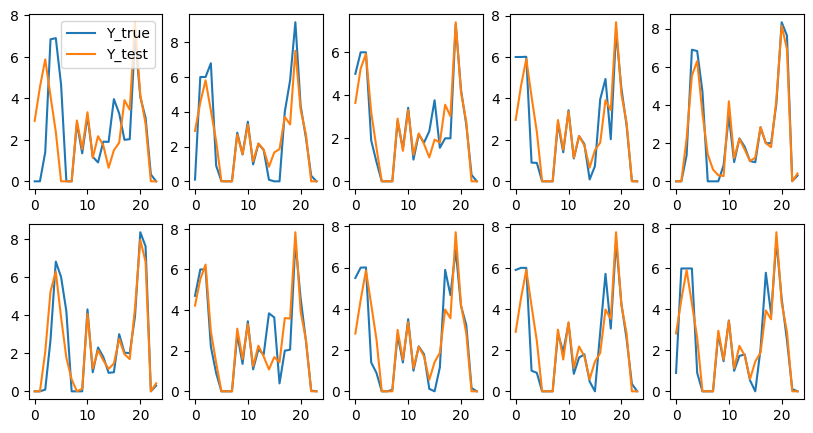

In [18]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    if i == 0:
        plt.plot(Y_true[i],label='Y_true')
        plt.plot(Y_test[i],label='Y_test')
        plt.legend()
    else:
        plt.plot(Y_true[i])
        plt.plot(Y_test[i])
plt.show()